In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('eda.csv')

we need to choose relevant columns to use in our model
we need to get dummy data 
we need to create train/test split  - train set, validation set, test set . train and validate and then test it
1. multiple linear regression
2. lasso regression
3. random forest 
4. SVM 
5.  Tune models using gridsearchCV

In [3]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Sector','Revenue',
             'job_state','job_simp','seniority','desc_len']]

In [4]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,job_state,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),NM,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),MD,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),FL,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,NY,data scientist,na,2728


In [5]:
df_dum = pd.get_dummies(df_model)

In [6]:
df_dum

,avg_salary,Rating,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,2536,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,4783,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,3461,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3883,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,2728,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,6162,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,6130,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,3078,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,1642,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# multiple linear regression 
import statsmodels.api as sm

In [11]:
x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     12.18
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.99e-96
Time:                        21:23:44   Log-Likelihood:                -3375.8
No. Observations:                 742   AIC:                             6952.
Df Residuals:                     642   BIC:                             7412.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               51.8217      6.171      8.397      0.000      39.703      63.940
Rating                                               1.4645      1.813      0.808      0.419      -2.095       5.024
desc_len                                             0.0007      0.001      1.012      0.312      -0.001       0.002
Size_-1                                             20.3750      8.650      2.356      0.019       3.390      37.360
Size_1 to 50 employees                               0.0614      6.037      0.010      0.992     -11.793      11.916
Size_10000+ employees                               -3.4594      5.285     -0.655      0.513     -13.838       6.919
Size_1001 to 5000 employees                          2.7198      3.605      0.754      0.451      -4.360       9.800
Size_201 to 500 employees                            0.4566      3.718      0.123      0.902      -6.844       7.757
Size_5001 to 10000 employees                        -7.0635      5.006     -1.411      0.159     -16.893       2.766
Size_501 to 1000 employees                          -1.6570      3.822     -0.434      0.665      -9.163       5.849
Size_51 to 200 employees                             3.5110      4.216      0.833      0.405      -4.767      11.789
Size_Unknown                                        36.8780     12.700      2.904      0.004      11.940      61.816
Type of ownership_-1                                20.3750      8.650      2.356      0.019       3.390      37.360
Type of ownership_College / University              25.6372     12.338      2.078      0.038       1.410      49.865
Type of ownership_Company - Private                 10.7479      4.751      2.262      0.024       1.419      20.077
Type of ownership_Company - Public                  11.5788      5.171      2.239      0.025       1.425      21.732
Type of ownership_Government                        -1.6953     14.060     -0.121      0.904     -29.305      25.914
Type of ownership_Hospital                         -19.8700      9.495     -2.093      0.037     -38.516      -1.224
Type of ownership_Nonprofit Organization            -5.5948      6.338     -0.883      0.378     -18.040       6.850
Type of ownership_Other Organization                 2.4433     14.623      0.167      0.867     -26.272      31.158
Type of ownership_School / School District           1.0905     19.046      0.057      0.954     -36.309      38.490
Type of ownership_Subsidiary or Business Segment    14.2218      6.229      2.283      0.023       1.990      26.454
Type of ownership_Unknown                           -7.1126     25.033     -0.284      0.776     -56.269      42.044
Sector_-1                                

This time with SKLEARN and qwe will cross-validate

In [12]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
np.mean(cross_val_score(lm,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21.25839687955556

Lasso regression

,alpha,error
15,0.16,-20.237522


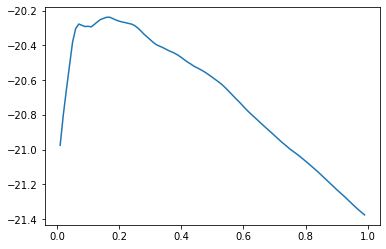

In [15]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [16]:
lm_l = Lasso(alpha=.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-20.263786778494353

In [17]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error')

np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))
#There are many zero/one so , random forest should perform well

-15.344953938710285

In [18]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [19]:
rf = RandomForestRegressor(criterion='absolute_error')


In [21]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)



GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='absolute_error'),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [28]:
print(gs.best_score_)
print(gs.best_estimator_)

-14.825334197669223
RandomForestRegressor(criterion='mse', n_estimators=70)


In [30]:
# test ensembles 
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)


In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

10.741946308724833

In [32]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

13.954723961311494

Pickle the model

In [33]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [39]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']




In [ ]:
print("prediction:", model.predict(np.array(list(x_test.iloc[1,:])).reshape(1,-1))[0]